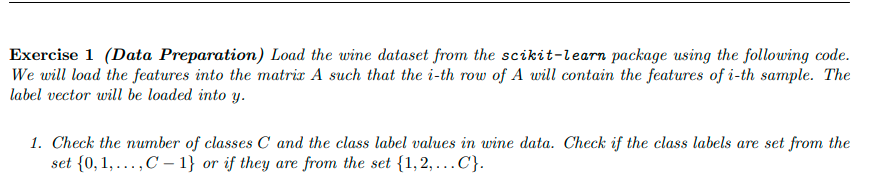

In [ ]:
import numpy as np
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Number of classes and class label values in wine data
C = len(np.unique(wine.target))
class_labels = np.unique(wine.target)

# Check if class labels are from {0, 1, ..., C-1} or {1, 2, ..., C}
if np.min(wine.target) == 0:
    print("Class labels are from the set {0, 1, ..., C-1}")
else:
    print("Class labels are from the set {1, 2, ..., C}")

print("Number of classes:", C)
print("Class label values:", class_labels)
print("Shape of wine.target is",wine.target.shape)
print("Shape of wine.data is",wine.data.shape)


Class labels are from the set {0, 1, ..., C-1}
Number of classes: 3
Class label values: [0 1 2]
Shape of wine.target is (178,)
Shape of wine.data is (178, 13)


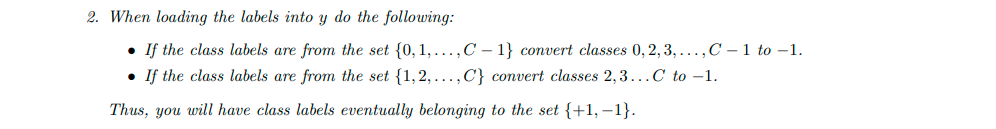

In [ ]:
import numpy as np
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Check if class labels are from {0, 1, ..., C-1} or {1, 2, ..., C}
if np.min(wine.target) == 0:
    y = np.ones(wine.target.shape)  # Initialize y with all ones
    y[wine.target % 2 == 0] = -1  # Convert even classes to -1
else:
    y = np.ones(wine.target.shape) * -1  # Initialize y with all -1
    y[wine.target > 1] = 1  # Convert classes 2, 3, ..., C to 1

print("Modified labels:", y)

Modified labels: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


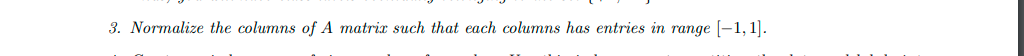

In [ ]:
A = wine.data
for i in range(A.shape[1]):
  col_max = abs(A[:,i])
  A[:,i] = A[:,i]/max(col_max)
print(A)

[[0.95954147 0.29482759 0.75232198 ... 0.60818713 0.98       0.63392857]
 [0.89008766 0.30689655 0.6625387  ... 0.61403509 0.85       0.625     ]
 [0.88739042 0.40689655 0.82662539 ... 0.60233918 0.7925     0.70535714]
 ...
 [0.89480782 0.73793103 0.6996904  ... 0.34502924 0.39       0.49702381]
 [0.88806473 0.44655172 0.73374613 ... 0.35087719 0.405      0.5       ]
 [0.95279838 0.70689655 0.84829721 ... 0.35672515 0.4        0.33333333]]


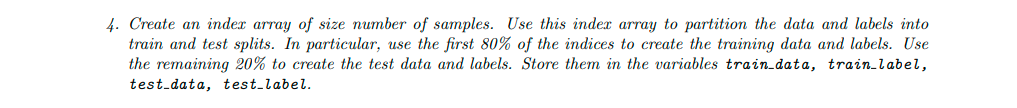

In [ ]:
import numpy as np
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Shuffled index array
indexarr = np.arange(len(wine.data))
np.random.shuffle(indexarr)

# Split ratio
split_ratio = 0.8
split_idx = int(len(indexarr) * split_ratio)

# Train data and labels
train_data = wine.data[indexarr[:split_idx]]
train_label = y[indexarr[:split_idx]]

# Test data and labels
test_data = wine.data[indexarr[split_idx:]]
test_label = y[indexarr[split_idx:]]

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_label.shape)

Train data shape: (142, 13)
Train label shape: (142,)
Test data shape: (36, 13)
Test label shape: (36,)


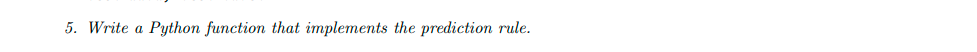

In [ ]:
def predict(w, x):
    """
    Predict the class label using the perceptron prediction rule.

    Parameters:
    w (array-like): The weight vector.
    x (array-like): The input features.

    Returns:
    int: Predicted class label (+1 or -1).
    """
    # Compute the dot product of weights and input features
    wx = np.dot(w, x)

    # Apply the sign function to determine the predicted class label
    if wx >= 0:
        return 1
    else:
        return -1

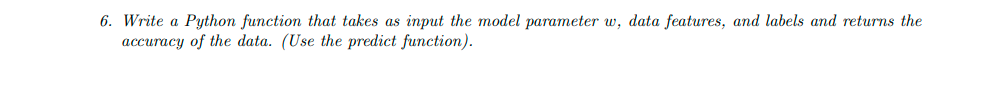

In [ ]:
def accuracy(w, X, y):
    # Implement the prediction function
    def predict(w, X):
        # Add bias term to features
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        # Calculate predictions
        predictions = np.sign(np.dot(X_bias, w))
        return predictions

    # Get predictions using the predict function
    y_pred = predict(w, X)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y)
    return accuracy
